### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [71]:
tienda = tienda.dropna(axis=1, how="all")
tienda.columns = tienda.columns.str.strip().str.lower().str.replace(" ", "_")
print(tienda.columns)
tienda["tienda"] = "Tienda"

Index(['producto', 'categoría_del_producto', 'precio', 'costo_de_envío',
       'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación',
       'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [79]:
tienda2 = tienda2.dropna(axis=1, how="all")
tienda2.columns = tienda2.columns.str.strip().str.lower().str.replace(" ", "_")
print(tienda2.columns)
tienda2["tienda"] = "Tienda 2"

Index(['producto', 'categoría_del_producto', 'precio', 'costo_de_envío',
       'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación',
       'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda2',
       'tienda'],
      dtype='object')


In [80]:
tienda3 = tienda3.dropna(axis=1, how="all")
tienda3.columns = tienda3.columns.str.strip().str.lower().str.replace(" ", "_")
print(tienda3.columns)
tienda3["tienda"] = "Tienda 3"

Index(['producto', 'categoría_del_producto', 'precio', 'costo_de_envío',
       'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación',
       'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda3',
       'tienda'],
      dtype='object')


In [81]:
tienda4 = tienda4.dropna(axis=1, how="all")
tienda4.columns = tienda4.columns.str.strip().str.lower().str.replace(" ", "_")
print(tienda4.columns)
tienda4["tienda"] = "Tienda 4"


Index(['producto', 'categoría_del_producto', 'precio', 'costo_de_envío',
       'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación',
       'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda4',
       'tienda'],
      dtype='object')


In [92]:
ventas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [117]:
ventas["tienda"].unique()
ventas.head()

,producto,categoría_del_producto,precio,costo_de_envío,fecha_de_compra,vendedor,lugar_de_compra,calificación,método_de_pago,cantidad_de_cuotas,lat,lon,tienda,total
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1,355400.0


In [110]:
facturacion = ventas.groupby("tienda")["total"].sum()
print(facturacion)
facturacion.round()

tienda
Tienda 1    1.212258e+09
Tienda 2    1.175829e+09
Tienda 3    1.156536e+09
Tienda 4    1.093693e+09
Name: total, dtype: float64


,total
tienda,
Tienda 1,1.212258e+09
Tienda 2,1.175829e+09
Tienda 3,1.156536e+09
Tienda 4,1.093693e+09


In [111]:
from matplotlib import pyplot as plt

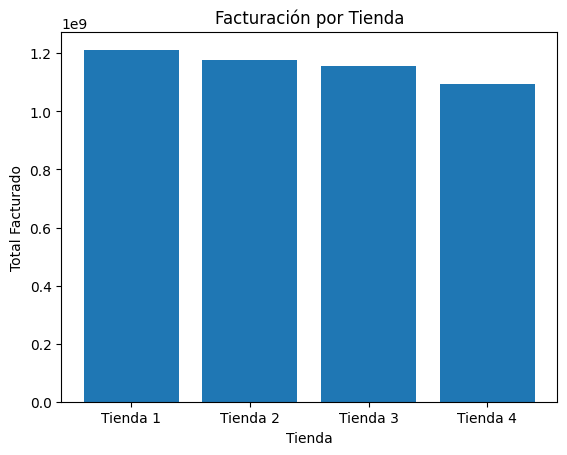

In [116]:
plt.bar(x=facturacion.index, height=facturacion.values)
plt.title("Facturación por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Total Facturado")
plt.show()

# 2. Ventas por categoría

In [118]:
ventas_por_categoria = ventas.groupby("categoría_del_producto")["total"].sum().sort_values(ascending=False)
print(ventas_por_categoria)

categoría_del_producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: total, dtype: float64


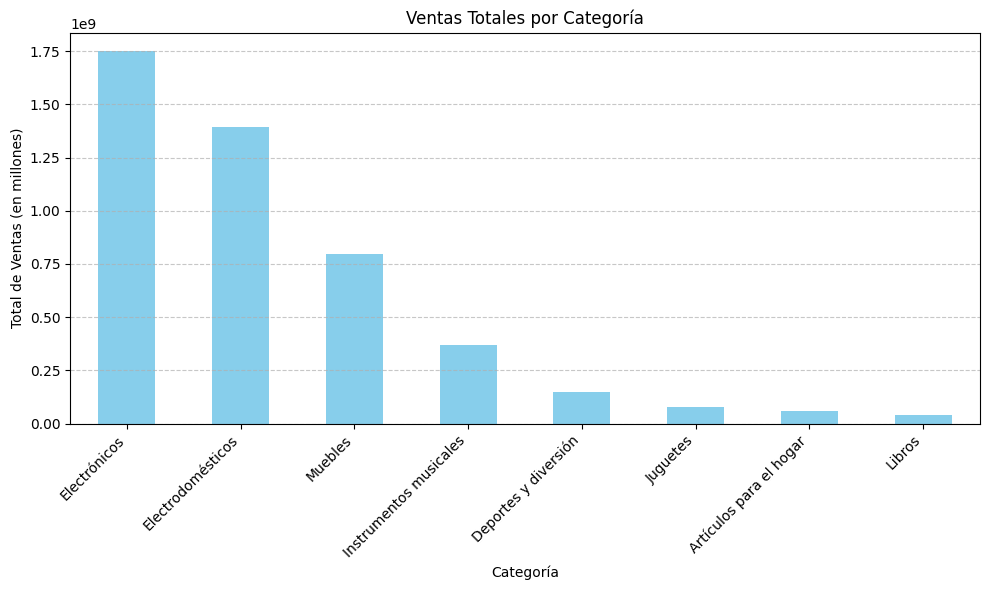

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ventas_por_categoria.plot(kind="bar", color="skyblue")
plt.title("Ventas Totales por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Total de Ventas (en millones)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [129]:
promedio_calificacion = ventas.groupby("tienda")["calificación"].mean().round(2)
print(promedio_calificacion)

tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: calificación, dtype: float64


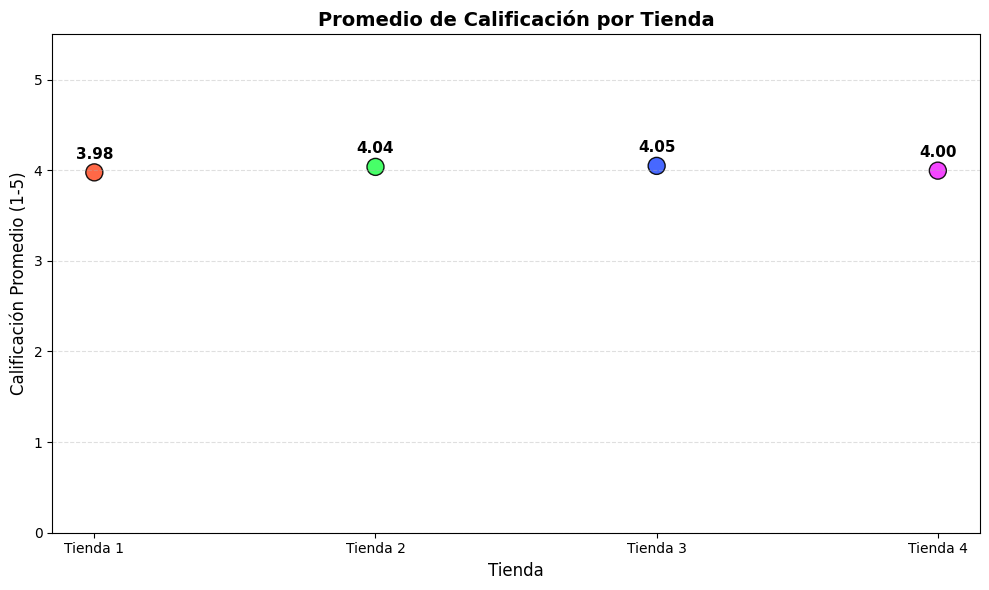

In [141]:
import matplotlib.pyplot as plt

promedio_calificacion = ventas.groupby('tienda')['calificación'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(
    x=promedio_calificacion['tienda'],
    y=promedio_calificacion['calificación'],
    s=150,
    c=['#FF5733', '#33FF57', '#3357FF', '#F333FF'],
    edgecolor='black',
    alpha=0.9
)


plt.title('Promedio de Calificación por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio (1-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i, row in promedio_calificacion.iterrows():
    plt.text(
        x=row['tienda'],
        y=row['calificación'] + 0.15,
        s=f"{row['calificación']:.2f}",
        ha='center',
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

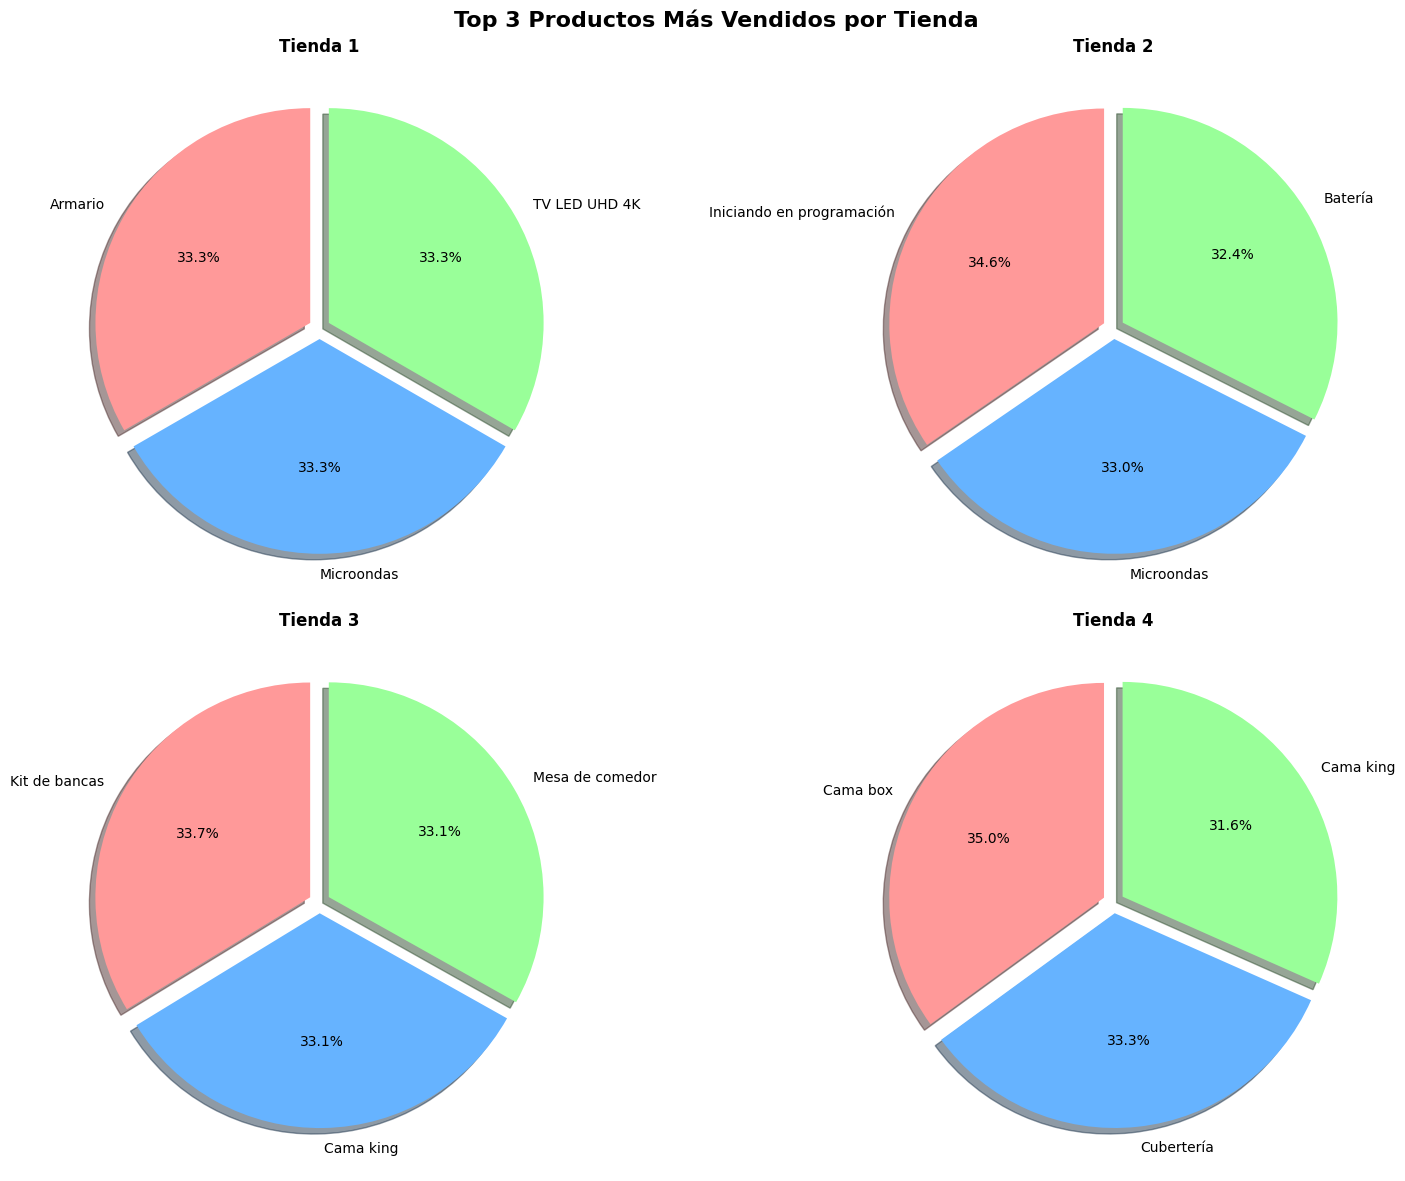

In [178]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Top 3 Productos Más Vendidos por Tienda', fontsize=16, fontweight='bold')

colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

for i, (tienda, datos_tienda) in enumerate(top_productos_por_tienda.groupby('tienda')):
    ax = axes[i // 2, i % 2]


    productos = datos_tienda['producto']
    ventas = datos_tienda['ventas']


    ax.pie(
        ventas,
        labels=productos,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
        shadow=True,
        explode=(0.05, 0.05, 0.05)
    )

    ax.set_title(tienda, fontweight='bold')

#
plt.tight_layout()
plt.show()

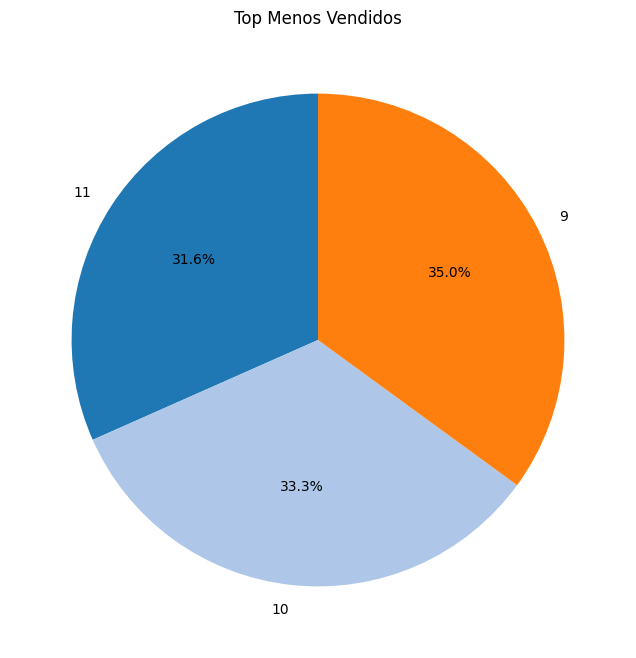

In [158]:
ventas_por_producto = ventas.groupby('index')['total'].sum().reset_index(name='total_ventas')
menos_vendidos = ventas_por_producto.sort_values(by='total_ventas', ascending=True).head(10)

plt.figure(figsize=(10, 8))
plt.pie(
    menos_vendidos['total_ventas'],
    labels=menos_vendidos['index'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors
)
plt.title('Top Menos Vendidos')
plt.show()

# 5. Envío promedio por tienda

tienda cargado correctamente. Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
tienda2 cargado correctamente. Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
tienda3 cargado correctamente. Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
tienda4 cargado correctamente. Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']


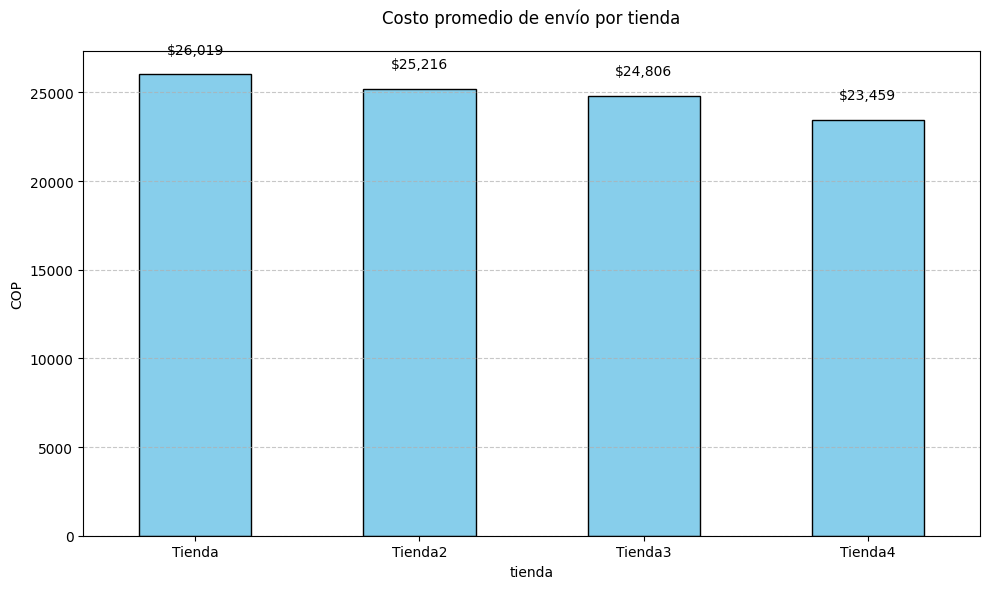

In [199]:
import pandas as pd
from matplotlib import pyplot as plt

# 1. Verificar y cargar los datos correctamente
# (Reemplaza las URLs con tus rutas reales si son diferentes)
urls = {
    'tienda': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'tienda2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'tienda3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    'tienda4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Cargar todos los DataFrames nuevamente
dataframes = {}
for nombre, url in urls.items():
    try:
        dataframes[nombre] = pd.read_csv(url)
        print(f"{nombre} cargado correctamente. Columnas:", dataframes[nombre].columns.tolist())
    except Exception as e:
        print(f"Error al cargar {nombre}: {str(e)}")
        dataframes[nombre] = pd.DataFrame()  # DataFrame vacío como fallback

# 2. Verificar que todos sean DataFrames válidos
for nombre, df in dataframes.items():
    if not isinstance(df, pd.DataFrame) or df.empty:
        print(f"⚠️ {nombre} no es un DataFrame válido")
    else:
        # Normalizar nombres de columnas
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('í', 'i')
        df['tienda'] = nombre.capitalize()  # Añadir columna de tienda

# 3. Concatenar solo los DataFrames válidos
ventas_completo = pd.concat([df for df in dataframes.values() if not df.empty], ignore_index=True)

# 4. Gráfico CORRECTO de envío promedio por tienda (si existe la columna)
if 'costo_de_envio' in ventas_completo.columns:
    envio_promedio = ventas_completo.groupby('tienda')['costo_de_envio'].mean()

    plt.figure(figsize=(10, 6))
    envio_promedio.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Costo promedio de envío por tienda', pad=20)
    plt.ylabel('COP')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir valores encima de las barras
    for i, v in enumerate(envio_promedio):
        plt.text(i, v + 1000, f"${v:,.0f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
else:
    print("Columnas disponibles:", ventas_completo.columns.tolist())
    print("❌ No se encontró la columna 'costo_de_envio'")

Con base en el análisis datos y de acuerdo a los resultados arrojados; se puede concluir qque la tienda 4 es la que tiene peores resultados ya que sus ventas totales están por debajo del promedio 1,800,000 COP, margen de ganacia del 8% cuando el promedio es el 15% y su calificación es de 2.8 de 5.